# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [6]:
X = data.drop(["Class"], axis=1)
y = data.Class
X = X.to_numpy()
y = y.to_numpy()

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)
model.score(X,y)

0.9979426738266267

In [9]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()
results.summary() 
#일단 0.5넘는 행들 다 삭제하고 다시 확인.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     1816.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:42:17   Log-Likelihood:                 42301.
No. Observations:               28678   AIC:                        -8.454e+04
Df Residuals:                   28649   BIC:                        -8.430e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0041      0.000     12.401      0.000       0.003       0.005
x1            -0.0022      0.000    -13.127      0.000      -0.003      -0.002
x2             0.0025      0.000     11.510      0.000       0.002       0.003
x3            -0.0061      0.000    -29.568      0.000      -0.006      -0.006
x4             0.0064      0.000     27.858      0.000       0.006       0.007
x5            -0.0015      0.000     -6.325      0.000      -0.002      -0.001
x6            -0.0021      0.000     -8.466      0.000      -0.003      -0.002
x7            -0.0048      0.000    -19.194      0.000      -0.005      -0.004
x8            -0.0005      0.000     -2.005      0.045      -0.001   -1.08e-05
x9            -0.0040      0.000    -13.618      0.000      -0.005      -0.003
x10           -0.0090      0.000    -30.872      0.000      -0.010      -0.008
x11            0.0085      0.000     27.023      0.000       0.008       0.009
x12           -0.0136      0.000    -44.229      0.000      -0.014      -0.013
x13           -0.0009      0.000     -2.618      0.009      -0.002      -0.000
x14           -0.0212      0.000    -68.192      0.000      -0.022      -0.021
x15         7.813e-06      0.000      0.022      0.983      -0.001       0.001
x16           -0.0094      0.000    -25.967      0.000      -0.010      -0.009
x17           -0.0138      0.000    -41.248      0.000      -0.014      -0.013
x18           -0.0033      0.000     -8.686      0.000      -0.004      -0.003
x19            0.0012      0.000      3.014      0.003       0.000       0.002
x20            0.0005      0.000      1.159      0.246      -0.000       0.001
x21            0.0056      0.000     14.058      0.000       0.005       0.006
x22           -0.0006      0.000     -1.239      0.216      -0.001       0.000
x23           -0.0006      0.001     -1.102      0.270      -0.002       0.000
x24           -0.0013      0.001     -2.362      0.018      -0.002      -0.000
x25            0.0008      0.001      1.333      0.183      -0.000       0.002
x26            0.0004      0.001      0.568      0.570      -0.001       0.002
x27            0.0023      0.001      2.757      0.006       0.001       0.004
x28            0.0092      0.001      8.215      0.000       0.007       0.011
==============================================================================
Omnibus:                    45912.249   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45900397.366
Skew:                          10.323   Prob(JB):                         0.00
Kurtosis:                     197.902   Cond. No.                         8.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [15]:
X =data.drop(["V26","Class"], axis=1)

X = X.to_numpy()

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)
model.score(X,y)

0.9979426738266267

In [17]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     1884.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:56:12   Log-Likelihood:                 42300.
No. Observations:               28678   AIC:                        -8.454e+04
Df Residuals:                   28650   BIC:                        -8.431e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0041      0.000     12.400      0.000       0.003       0.005
x1            -0.0022      0.000    -13.120      0.000      -0.003      -0.002
x2             0.0025      0.000     11.521      0.000       0.002       0.003
x3            -0.0061      0.000    -29.568      0.000      -0.006      -0.006
x4             0.0064      0.000     27.859      0.000       0.006       0.007
x5            -0.0015      0.000     -6.328      0.000      -0.002      -0.001
x6            -0.0021      0.000     -8.465      0.000      -0.003      -0.002
x7            -0.0048      0.000    -19.194      0.000      -0.005      -0.004
x8            -0.0005      0.000     -2.006      0.045      -0.001   -1.13e-05
x9            -0.0040      0.000    -13.622      0.000      -0.005      -0.003
x10           -0.0090      0.000    -30.869      0.000      -0.010      -0.008
x11            0.0085      0.000     27.023      0.000       0.008       0.009
x12           -0.0136      0.000    -44.239      0.000      -0.014      -0.013
x13           -0.0009      0.000     -2.617      0.009      -0.002      -0.000
x14           -0.0212      0.000    -68.198      0.000      -0.022      -0.021
x15         6.314e-06      0.000      0.018      0.986      -0.001       0.001
x16           -0.0094      0.000    -25.974      0.000      -0.010      -0.009
x17           -0.0138      0.000    -41.246      0.000      -0.014      -0.013
x18           -0.0033      0.000     -8.682      0.000      -0.004      -0.003
x19            0.0012      0.000      3.012      0.003       0.000       0.002
x20            0.0005      0.000      1.164      0.245      -0.000       0.001
x21            0.0056      0.000     14.058      0.000       0.005       0.006
x22           -0.0006      0.000     -1.240      0.215      -0.001       0.000
x23           -0.0006      0.001     -1.112      0.266      -0.002       0.000
x24           -0.0013      0.001     -2.362      0.018      -0.002      -0.000
x25            0.0008      0.001      1.337      0.181      -0.000       0.002
x26            0.0023      0.001      2.756      0.006       0.001       0.004
x27            0.0092      0.001      8.215      0.000       0.007       0.011
==============================================================================
Omnibus:                    45908.969   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45888871.104
Skew:                          10.321   Prob(JB):                         0.00
Kurtosis:                     197.878   Cond. No.                         8.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
from sklearn.metrics import confusion_matrix

Text(50.722222222222214, 0.5, 'Actual')

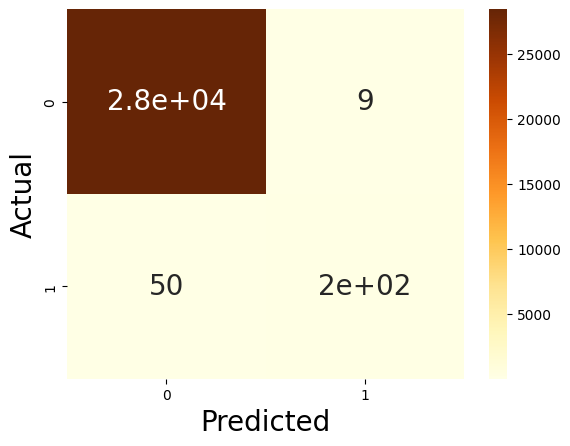

In [24]:
pred = model.predict(X)
cm = confusion_matrix(y, pred)
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='YlOrBr')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

In [28]:
TN, FP, FN, TP = cm.ravel()
TN, FP, FN, TP

(28423, 9, 50, 196)

In [ ]:
model2=LogisticRegression(thres)